In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df_EPI = pd.read_csv('data/EPI_Score_2020.csv')
df_EPI.head()

,Code,Code Name,Country,EPI Score
0,4,AFG,Afghanistan,25.5
1,24,AGO,Angola,29.7
2,8,ALB,Albania,49.0
3,784,ARE,United Arab Emirates,55.6
4,32,ARG,Argentina,52.2


In [3]:
df_EPI = df_EPI.drop(['Code'], axis=1)
df_EPI

,Code Name,Country,EPI Score
0,AFG,Afghanistan,25.5
1,AGO,Angola,29.7
2,ALB,Albania,49.0
3,ARE,United Arab Emirates,55.6
4,ARG,Argentina,52.2
...,...,...,...
175,VUT,Vanuatu,28.9
176,WSM,Samoa,37.3
177,ZAF,South Africa,43.1
178,ZMB,Zambia,34.7


In [4]:
df_EPI = df_EPI.rename(columns={"Code Name": "Code"})

In [5]:
df_EPI

,Code,Country,EPI Score
0,AFG,Afghanistan,25.5
1,AGO,Angola,29.7
2,ALB,Albania,49.0
3,ARE,United Arab Emirates,55.6
4,ARG,Argentina,52.2
...,...,...,...
175,VUT,Vanuatu,28.9
176,WSM,Samoa,37.3
177,ZAF,South Africa,43.1
178,ZMB,Zambia,34.7


In [6]:
df_CO2_Admission = pd.read_csv('data/annual_co2_emissions_per_country.csv')
df_CO2_Admission.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [7]:
df_CO2_Admission = df_CO2_Admission.rename(columns={"Entity": "Country"})
df_CO2_Admission

,Country,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [8]:
df_CO2_Admission = df_CO2_Admission.loc[df_CO2_Admission['Year'] == 2017]
df_CO2_Admission

,Country,Code,Year,Annual CO₂ emissions (tonnes)
68,Afghanistan,AFG,2017,1.301474e+07
335,Africa,NaN,2017,1.331740e+09
420,Albania,ALB,2017,6.379207e+06
528,Algeria,DZA,2017,1.505514e+08
795,Americas (other),NaN,2017,2.398632e+09
...,...,...,...,...
20352,Wallis and Futuna Islands,NaN,2017,2.590908e+04
20619,World,OWID_WRL,2017,3.615326e+10
20687,Yemen,YEM,2017,1.896575e+07
20746,Zambia,ZMB,2017,4.746148e+06


In [9]:
df_CO2_Admission = df_CO2_Admission.drop(['Country'], axis=1)
df_CO2_Admission

,Code,Year,Annual CO₂ emissions (tonnes)
68,AFG,2017,1.301474e+07
335,NaN,2017,1.331740e+09
420,ALB,2017,6.379207e+06
528,DZA,2017,1.505514e+08
795,NaN,2017,2.398632e+09
...,...,...,...
20352,NaN,2017,2.590908e+04
20619,OWID_WRL,2017,3.615326e+10
20687,YEM,2017,1.896575e+07
20746,ZMB,2017,4.746148e+06


In [10]:
result = pd.merge(df_EPI,
                 df_CO2_Admission,
                 on='Code')
result.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes)
0,AFG,Afghanistan,25.5,2017,1.301474e+07
1,AGO,Angola,29.7,2017,3.538993e+07
2,ALB,Albania,49.0,2017,6.379207e+06
3,ARE,United Arab Emirates,55.6,2017,2.317735e+08
4,ARG,Argentina,52.2,2017,2.043234e+08


In [11]:
df_Unemployment_Rate = pd.read_csv('data/Unemployment Rate.csv')
df_Unemployment_Rate.head()

,Country,Code,Unemployment Rate %
0,Aruba,ABW,NaN
1,Afghanistan,AFG,11.184
2,Angola,AGO,7.119
3,Albania,ALB,13.750
4,Andorra,AND,NaN


In [12]:
df_Unemployment_Rate = df_Unemployment_Rate.dropna()

In [13]:
df_Unemployment_Rate.head()

,Country,Code,Unemployment Rate %
1,Afghanistan,AFG,11.184000
2,Angola,AGO,7.119000
3,Albania,ALB,13.750000
5,Arab World,ARB,10.641313
6,United Arab Emirates,ARE,2.463000


In [14]:
df_Unemployment_Rate = df_Unemployment_Rate.drop(['Country'], axis=1)
df_Unemployment_Rate

,Code,Unemployment Rate %
1,AFG,11.184000
2,AGO,7.119000
3,ALB,13.750000
5,ARB,10.641313
6,ARE,2.463000
...,...,...
258,WSM,8.443000
260,YEM,13.152000
261,ZAF,27.070999
262,ZMB,11.626000


In [15]:
result1 = pd.merge(result,
                 df_Unemployment_Rate,
                 on='Code')
result1.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes),Unemployment Rate %
0,AFG,Afghanistan,25.5,2017,1.301474e+07,11.184
1,AGO,Angola,29.7,2017,3.538993e+07,7.119
2,ALB,Albania,49.0,2017,6.379207e+06,13.750
3,ARE,United Arab Emirates,55.6,2017,2.317735e+08,2.463
4,ARG,Argentina,52.2,2017,2.043234e+08,8.347


In [16]:
df_RE = pd.read_csv('data/Renewable Energy.csv')
df_RE.head()

,Code,TIME,Renewable Supply %
0,AUS,2008,5.57
1,AUS,2009,4.39
2,AUS,2010,5.25
3,AUS,2011,5.40
4,AUS,2012,5.44


In [17]:
df_RE = df_RE.dropna()

In [18]:
df_RE = df_RE.loc[df_RE['TIME'] == 2017]
df_RE

,Code,TIME,Renewable Supply %
9,AUS,2017,6.95
19,AUT,2017,29.02
29,BEL,2017,7.31
39,CAN,2017,17.32
49,CZE,2017,10.14
...,...,...,...
1369,SRB,2017,12.07
1379,MNE,2017,27.24
1389,G20,2017,11.28
1399,EU28,2017,13.73


In [19]:
df_RE = df_RE.drop(['TIME'], axis=1)
df_RE

,Code,Renewable Supply %
9,AUS,6.95
19,AUT,29.02
29,BEL,7.31
39,CAN,17.32
49,CZE,10.14
...,...,...
1369,SRB,12.07
1379,MNE,27.24
1389,G20,11.28
1399,EU28,13.73


In [20]:
result2 = pd.merge(result1,
                 df_RE,
                 on='Code')
result2.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes),Unemployment Rate %,Renewable Supply %
0,AGO,Angola,29.7,2017,3.538993e+07,7.119,47.25
1,ALB,Albania,49.0,2017,6.379207e+06,13.750,27.44
2,ARE,United Arab Emirates,55.6,2017,2.317735e+08,2.463,0.23
3,ARG,Argentina,52.2,2017,2.043234e+08,8.347,8.66
4,ARM,Armenia,52.3,2017,5.656392e+06,17.705,10.29


In [21]:
df_FF_Sub = pd.read_csv('data/fossil-fuel-subsidies.csv')
df_FF_Sub.head()

,Entity,Code,Year,Fossil-fuel pre-tax subsidies ($USD)
0,Afghanistan,AFG,2013,2.374000e+07
1,Afghanistan,AFG,2015,2.647000e+07
2,Africa,NaN,2013,7.632749e+10
3,Africa,NaN,2015,4.535455e+10
4,Albania,ALB,2013,1.900000e+08


In [22]:
df_FF_Sub = df_FF_Sub.loc[df_FF_Sub['Year'] == 2015]
df_FF_Sub

,Entity,Code,Year,Fossil-fuel pre-tax subsidies ($USD)
1,Afghanistan,AFG,2015,2.647000e+07
3,Africa,NaN,2015,4.535455e+10
5,Albania,ALB,2015,6.000000e+07
7,Algeria,DZA,2015,8.787420e+09
9,Americas,NaN,2015,5.556264e+10
...,...,...,...,...
365,Western Asia,NaN,2015,6.377253e+10
367,World,OWID_WRL,2015,3.330020e+11
369,Yemen,YEM,2015,1.094700e+08
371,Zambia,ZMB,2015,2.060110e+09


In [23]:
df_FF_Sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 373
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                186 non-null    object 
 1   Code                                  154 non-null    object 
 2   Year                                  186 non-null    int64  
 3   Fossil-fuel pre-tax subsidies ($USD)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.3+ KB


In [24]:
df_FF_Sub = df_FF_Sub.drop(['Entity', 'Year'], axis=1)
df_FF_Sub.head()

,Code,Fossil-fuel pre-tax subsidies ($USD)
1,AFG,2.647000e+07
3,NaN,4.535455e+10
5,ALB,6.000000e+07
7,DZA,8.787420e+09
9,NaN,5.556264e+10


In [25]:
df_FF_Sub = df_FF_Sub.dropna()

In [26]:
df_FF_Sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 1 to 373
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  154 non-null    object 
 1   Fossil-fuel pre-tax subsidies ($USD)  154 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


In [27]:
result3 = pd.merge(result2,
                 df_FF_Sub,
                 on='Code')
result3.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes),Unemployment Rate %,Renewable Supply %,Fossil-fuel pre-tax subsidies ($USD)
0,AGO,Angola,29.7,2017,3.538993e+07,7.119,47.25,9.635400e+08
1,ALB,Albania,49.0,2017,6.379207e+06,13.750,27.44,6.000000e+07
2,ARE,United Arab Emirates,55.6,2017,2.317735e+08,2.463,0.23,1.264331e+10
3,ARG,Argentina,52.2,2017,2.043234e+08,8.347,8.66,8.764600e+09
4,ARM,Armenia,52.3,2017,5.656392e+06,17.705,10.29,4.610000e+06


In [28]:
df_RE_Consumption = pd.read_csv('data/RE consumption.csv')
df_RE_Consumption.head()

,Country,Code,Year,Renewable Energy Consumption (% of Total)
0,Afghanistan,AFG,2015,18.423477
1,Africa,NaN,2015,NaN
2,Albania,ALB,2015,38.615210
3,Algeria,DZA,2015,0.058959
4,American Samoa,ASM,2015,0.885478


In [29]:
df_RE_Consumption = df_RE_Consumption.dropna()

In [30]:
df_RE_Consumption.head()

,Country,Code,Year,Renewable Energy Consumption (% of Total)
0,Afghanistan,AFG,2015,18.423477
2,Albania,ALB,2015,38.615210
3,Algeria,DZA,2015,0.058959
4,American Samoa,ASM,2015,0.885478
5,Andorra,AND,2015,19.747809


In [31]:
df_RE_Consumption = df_RE_Consumption.drop(['Country', 'Year'], axis=1)

In [32]:
df_RE_Consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 287
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code                                       213 non-null    object 
 1   Renewable Energy Consumption (% of Total)  213 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [33]:
result4 = pd.merge(result3,
                 df_RE_Consumption,
                 on='Code')
result4.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes),Unemployment Rate %,Renewable Supply %,Fossil-fuel pre-tax subsidies ($USD),Renewable Energy Consumption (% of Total)
0,AGO,Angola,29.7,2017,3.538993e+07,7.119,47.25,9.635400e+08,49.568210
1,ALB,Albania,49.0,2017,6.379207e+06,13.750,27.44,6.000000e+07,38.615210
2,ARE,United Arab Emirates,55.6,2017,2.317735e+08,2.463,0.23,1.264331e+10,0.137108
3,ARG,Argentina,52.2,2017,2.043234e+08,8.347,8.66,8.764600e+09,10.040078
4,ARM,Armenia,52.3,2017,5.656392e+06,17.705,10.29,4.610000e+06,15.792004


In [34]:
result4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code                                       126 non-null    object 
 1   Country                                    126 non-null    object 
 2   EPI Score                                  126 non-null    float64
 3   Year                                       126 non-null    int64  
 4   Annual CO₂ emissions (tonnes)              126 non-null    float64
 5   Unemployment Rate %                        126 non-null    float64
 6   Renewable Supply %                         126 non-null    float64
 7   Fossil-fuel pre-tax subsidies ($USD)       126 non-null    float64
 8   Renewable Energy Consumption (% of Total)  126 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 9.8+ KB


In [35]:
df_happy = pd.read_csv('data/Happiness Index_1.csv')
df_happy.head()

,Country,Happiness.Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


In [36]:
result5 = pd.merge(result4,
                 df_happy,
                 on='Country')
result5.head()

,Code,Country,EPI Score,Year,Annual CO₂ emissions (tonnes),Unemployment Rate %,Renewable Supply %,Fossil-fuel pre-tax subsidies ($USD),Renewable Energy Consumption (% of Total),Happiness.Score
0,AGO,Angola,29.7,2017,3.538993e+07,7.119,47.25,9.635400e+08,49.568210,3.795
1,ALB,Albania,49.0,2017,6.379207e+06,13.750,27.44,6.000000e+07,38.615210,4.644
2,ARE,United Arab Emirates,55.6,2017,2.317735e+08,2.463,0.23,1.264331e+10,0.137108,6.648
3,ARG,Argentina,52.2,2017,2.043234e+08,8.347,8.66,8.764600e+09,10.040078,6.599
4,ARM,Armenia,52.3,2017,5.656392e+06,17.705,10.29,4.610000e+06,15.792004,4.376


In [37]:
result5 = result5[['Code', 'Country', 'Year', 'Happiness.Score', 'Unemployment Rate %', 'EPI Score', 'Annual CO₂ emissions (tonnes)', 'Renewable Supply %', 'Fossil-fuel pre-tax subsidies ($USD)', 'Renewable Energy Consumption (% of Total)']]
result5.head()

,Code,Country,Year,Happiness.Score,Unemployment Rate %,EPI Score,Annual CO₂ emissions (tonnes),Renewable Supply %,Fossil-fuel pre-tax subsidies ($USD),Renewable Energy Consumption (% of Total)
0,AGO,Angola,2017,3.795,7.119,29.7,3.538993e+07,47.25,9.635400e+08,49.568210
1,ALB,Albania,2017,4.644,13.750,49.0,6.379207e+06,27.44,6.000000e+07,38.615210
2,ARE,United Arab Emirates,2017,6.648,2.463,55.6,2.317735e+08,0.23,1.264331e+10,0.137108
3,ARG,Argentina,2017,6.599,8.347,52.2,2.043234e+08,8.66,8.764600e+09,10.040078
4,ARM,Armenia,2017,4.376,17.705,52.3,5.656392e+06,10.29,4.610000e+06,15.792004


In [38]:
result5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code                                       119 non-null    object 
 1   Country                                    119 non-null    object 
 2   Year                                       119 non-null    int64  
 3   Happiness.Score                            119 non-null    float64
 4   Unemployment Rate %                        119 non-null    float64
 5   EPI Score                                  119 non-null    float64
 6   Annual CO₂ emissions (tonnes)              119 non-null    float64
 7   Renewable Supply %                         119 non-null    float64
 8   Fossil-fuel pre-tax subsidies ($USD)       119 non-null    float64
 9   Renewable Energy Consumption (% of Total)  119 non-null    float64
dtypes: float64(7), int64(1), o

In [39]:
X = result5[result5.columns[4:]] # Independent Variables
y = result5['Unemployment Rate %'] # Dependent Variables

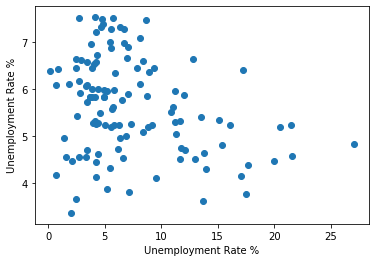

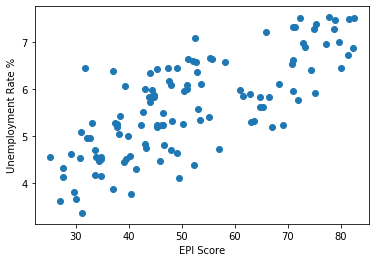

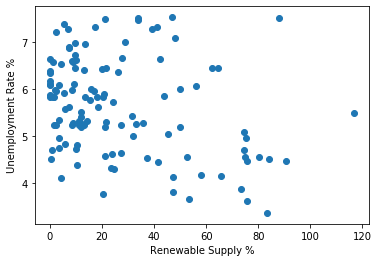

In [49]:
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col],y)
    plt.ylabel('Unemployment Rate %')
    plt.xlabel(col)
    plt.show();

In [41]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Unemployment Rate %                           2.943888
EPI Score                                     3.093036
Annual CO₂ emissions (tonnes)                 1.080862
Renewable Supply %                           22.140051
Fossil-fuel pre-tax subsidies ($USD)          1.134184
Renewable Energy Consumption (% of Total)    24.550769
dtype: float64

In [42]:
result6 = result5[['Code', 'Country', 'Year', 'Unemployment Rate %', 'Annual CO₂ emissions (tonnes)','Fossil-fuel pre-tax subsidies ($USD)', 'EPI Score', 'Renewable Supply %']]
result6.head()

,Code,Country,Year,Unemployment Rate %,Annual CO₂ emissions (tonnes),Fossil-fuel pre-tax subsidies ($USD),EPI Score,Renewable Supply %
0,AGO,Angola,2017,7.119,3.538993e+07,9.635400e+08,29.7,47.25
1,ALB,Albania,2017,13.750,6.379207e+06,6.000000e+07,49.0,27.44
2,ARE,United Arab Emirates,2017,2.463,2.317735e+08,1.264331e+10,55.6,0.23
3,ARG,Argentina,2017,8.347,2.043234e+08,8.764600e+09,52.2,8.66
4,ARM,Armenia,2017,17.705,5.656392e+06,4.610000e+06,52.3,10.29


In [43]:
X1 = result6[result6.columns[4:]] # Independent Variables
y1 = result6['Unemployment Rate %'] # Dependent Variables

In [44]:
X_withconstant = sm.add_constant(X1)

In [45]:
result6 = sm.OLS(y1,X_withconstant)

result6_2017 = result6.fit()

result6_2017.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Unemployment Rate %   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                 -0.014
Method:                  Least Squares   F-statistic:                    0.5844
Date:                 Sun, 07 Jun 2020   Prob (F-statistic):              0.675
Time:                         20:39:00   Log-Likelihood:                -361.49
No. Observations:                  119   AIC:                             733.0
Df Residuals:                      114   BIC:                             746.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    9.0442      2.138      4.229      0.000       4.808      13.281
Annual CO₂ emissions (tonnes)        -4.933e-10   5.14e-10     -0.960      0.339   -1.51e-09    5.25e-10
Fossil-fuel pre-tax subsidies ($USD) -2.058e-13   6.09e-11     -0.003      0.997   -1.21e-10     1.2e-10
EPI Score                               -0.0178      0.034     -0.528      0.598      -0.085       0.049
Renewable Supply %                      -0.0270      0.021     -1.295      0.198      -0.068       0.014
==============================================================================
Omnibus:                       31.941   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.171
Skew:                           1.323   Prob(JB):                     3.47e-11
Kurtosis:                       4.647   Cond. No.                     3.87e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X = result5[['Unemployment Rate %', 'EPI Score', 'Renewable Supply %']] # Independent Variables
y = result5['Happiness.Score'] # Dependent Variables

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [48]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
# 2. Fit model 
linear_regression_model.fit(X_train, y_train)

# 3. Score on training data 
print(linear_regression_model.score(X_train, y_train))

# 4. Score on testing data
print(linear_regression_model.score(X_test, y_test))

0.7150687986912505
0.436804917800485
